In [2]:
!python guvBB.py train --dataset ../../dataset --logs ../../logs --weights ../../logs/guv20201104T1228/mask_rcnn_guv_0010.h5

Using TensorFlow backend.
Weights:  ../../logs/guv20201104T1228/mask_rcnn_guv_0010.h5
Dataset:  ../../dataset
Logs:  ../../logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        15
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GENERATE_MASKS                 False
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_

Re-starting from epoch 10
Training network heads

Starting at epoch 10. LR=0.001

Checkpoint Path: ../../logs/guv20201104T1228/mask_rcnn_guv_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_class_logits     (TimeDistributed)
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may co

In [1]:
import os
import numpy as np
import json
import sys
import random
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
# sys.path.append(ROOT_DIR)
from guvBB import GUVBBDataset
from guv import  GUVConfig
import frcnn.utils as utils
from frcnn.utils import extract_bboxes
import frcnn.model as modellib
from frcnn.model import log
import frcnn.visualize as visualize
import tensorflow as tf
from matplotlib import pyplot as plt
# Directory to save logsand trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "dataset")

# Inference Configuration

Using TensorFlow backend.


In [2]:
class GUVBBInferenceConfig(GUVConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
            
config = GUVBBInferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        15
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GENERATE_MASKS                 False
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE       

In [3]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"



In [4]:
#get axis for displaying instances

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax



In [5]:
# Load validation dataset
dataset = GUVBBDataset()
dataset.load_GUV(DATASET_DIR, "val")
dataset.prepare()


In [6]:

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 12
Classes: ['BG', 'GUV']


In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [10]:
# Path to a specific weights file
weights_path = os.path.join(ROOT_DIR,'logs/guv20201104T1228/mask_rcnn_guv_0029.h5')

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /home/karim/guv_detect/FasterRCNN/Mask_RCNN/logs/guv20201104T1228/mask_rcnn_guv_0029.h5
Re-starting from epoch 29


image ID: GUV.image_59.png (7) /home/karim/guv_detect/FasterRCNN/Mask_RCNN/dataset/val/image_59.png
Original image shape:  [128 128   3]
Processing 1 images
image                    shape: (128, 128, 3)         min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 128, 128, 3)      min:    4.00000  max:  255.00000  uint8
image_metas              shape: (1, 14)               min:    0.00000  max:  128.00000  int64
anchors                  shape: (1, 4092, 4)          min:   -0.35634  max:    0.99077  float32
{'rois': array([[ 57, 107,  68, 119],
       [ 87,  69,  98,  82],
       [ 98,  77, 110,  88],
       [ 14,  14,  27,  26],
       [  4,  21,  18,  31],
       [ 93,   9, 104,  21],
       [ 43, 101,  56, 113],
       [ 17,  77,  27,  88],
       [ 48,  40,  58,  50],
       [ 59,  46,  69,  58],
       [  5,   7,  17,  20],
       [  7,  83,  18,  93],
       [ 94,  21, 103,  30]], dtype=int32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtyp

{'rois': array([[ 21,  82,  34,  93],
       [ 51, 107,  63, 118],
       [ 64, 112,  75, 124],
       [ 62,  50,  74,  63],
       [104,  81, 115,  93],
       [ 50,  56,  62,  67],
       [ 13,  14,  26,  27],
       [105,  19, 116,  32],
       [ 25,  21,  34,  31]], dtype=int32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), 'scores': array([0.99979585, 0.9996594 , 0.9995492 , 0.9994747 , 0.99935836,
       0.9986987 , 0.99848515, 0.99813724, 0.99715364], dtype=float32)}
[[ 13  15  26  28]
 [ 24  22  34  32]
 [ 21  81  36  94]
 [ 50  55  63  69]
 [ 61  49  76  65]
 [ 51 106  64 119]
 [ 62 111  78 125]
 [103  81 118  95]
 [103  19 118  33]]
gt_class_id              shape: (9,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (9, 4)                min:   13.00000  max:  125.00000  int32
AP @0.50:	 1.000
AP @0.55:	 1.000
AP @0.60:	 0.815
AP @0.65:	 0.519
AP @0.70:	 0.411
AP @0.75:	 0.087
AP @0.80:	 0.016
AP @0.85:	 0.016
AP @0.90

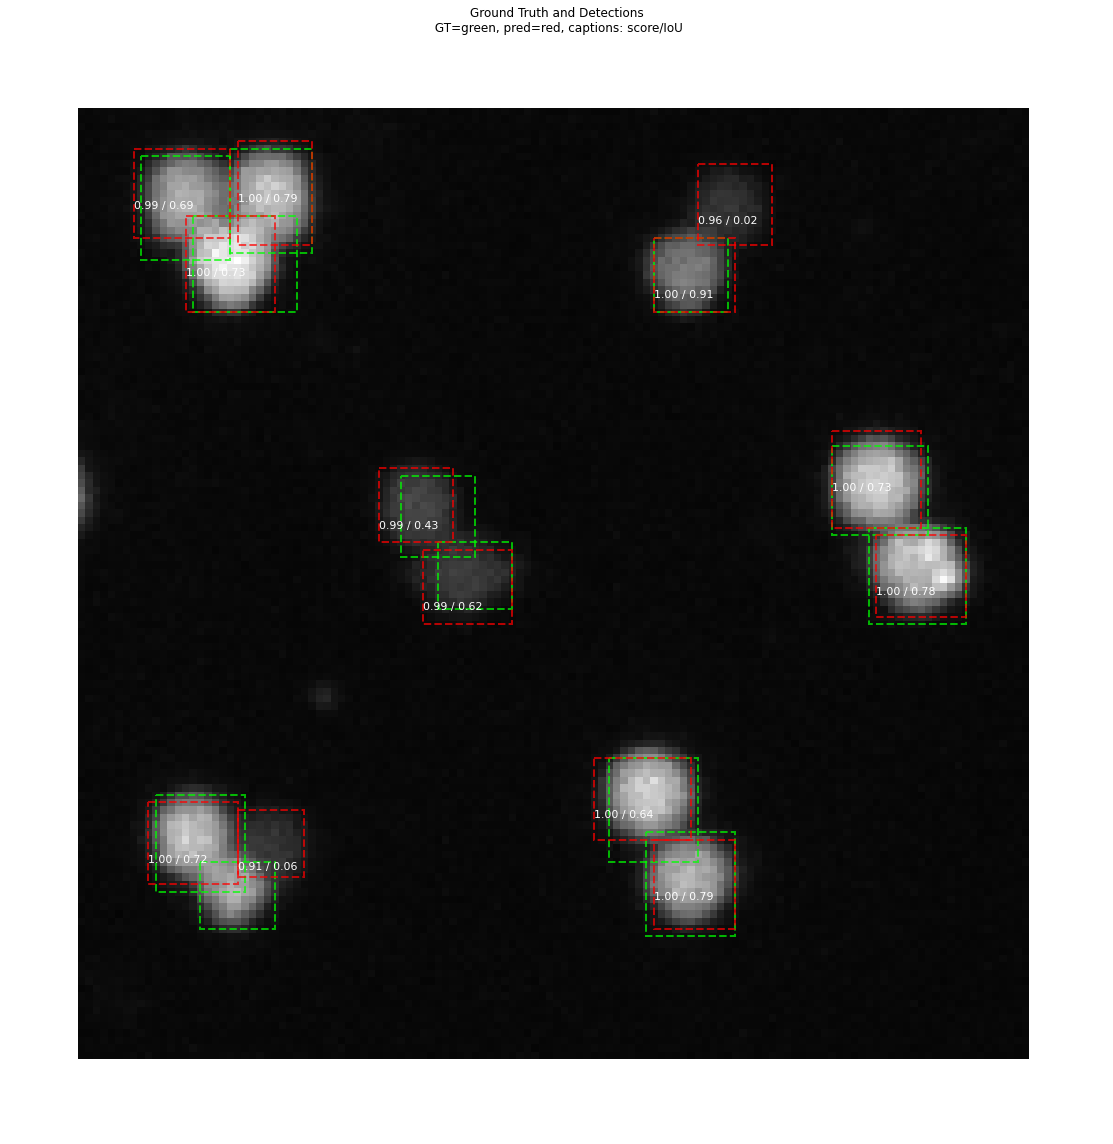

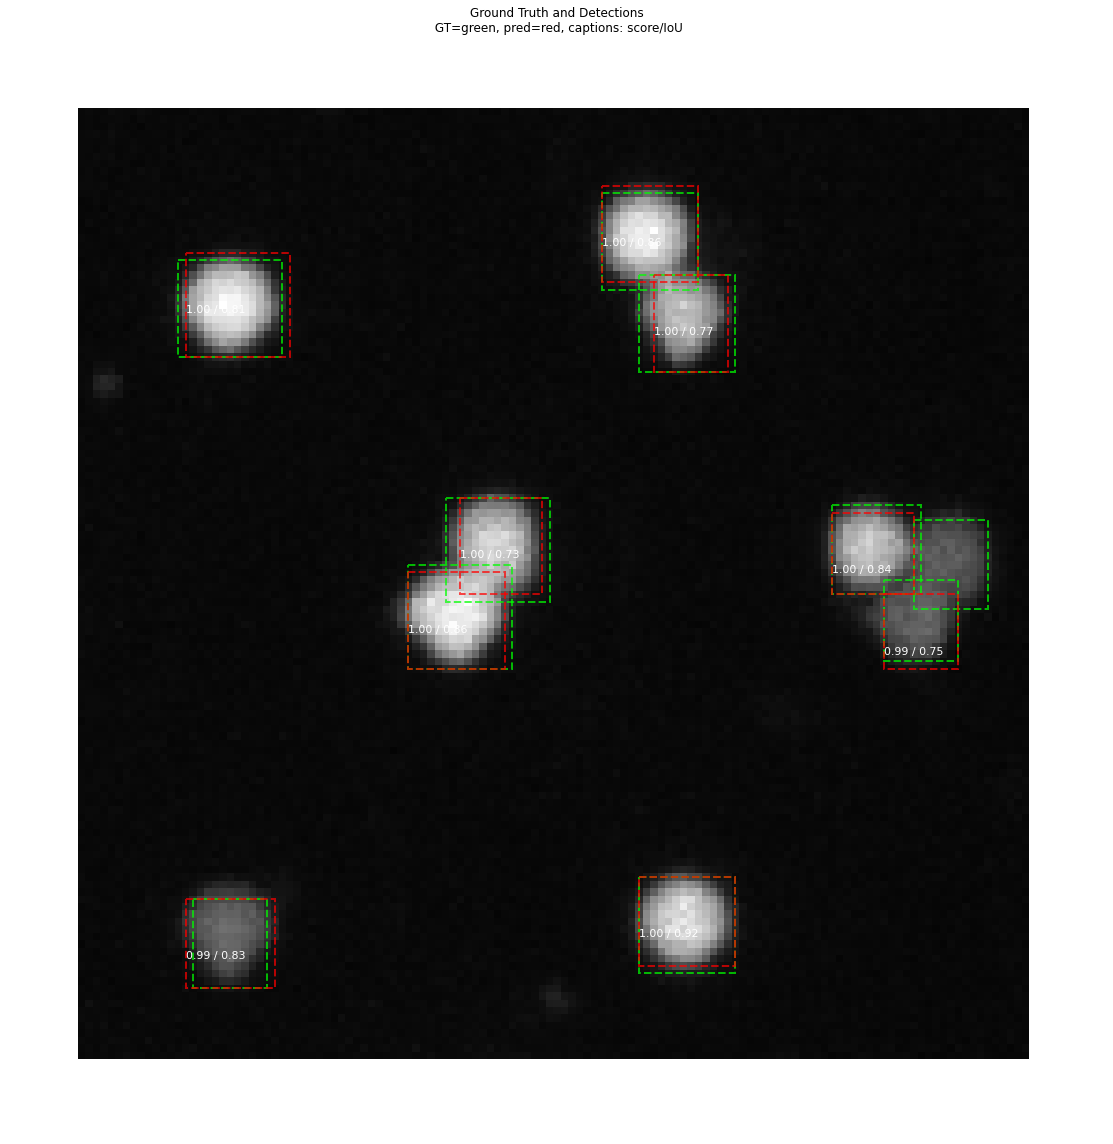

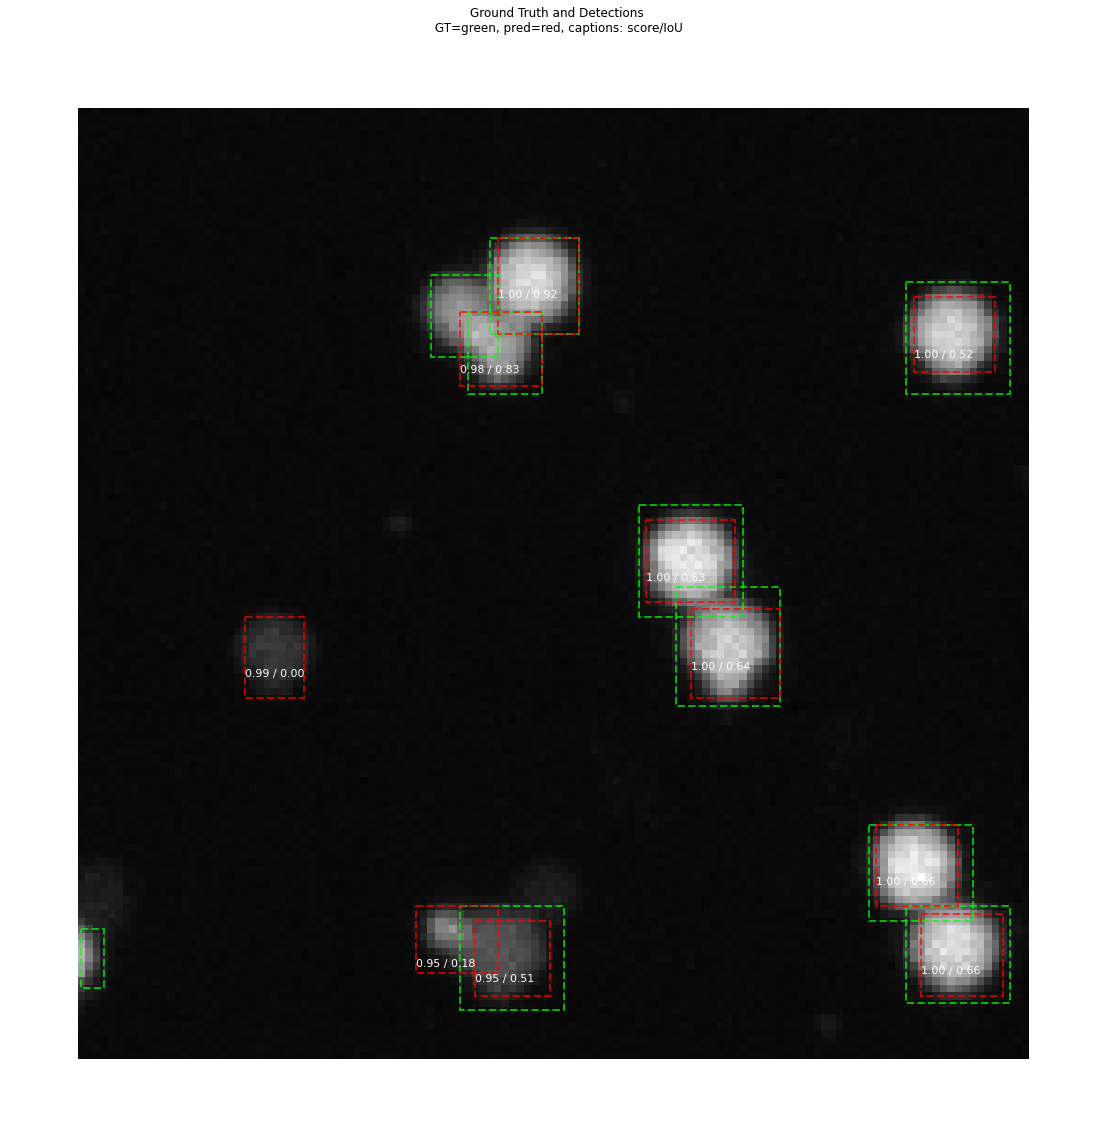

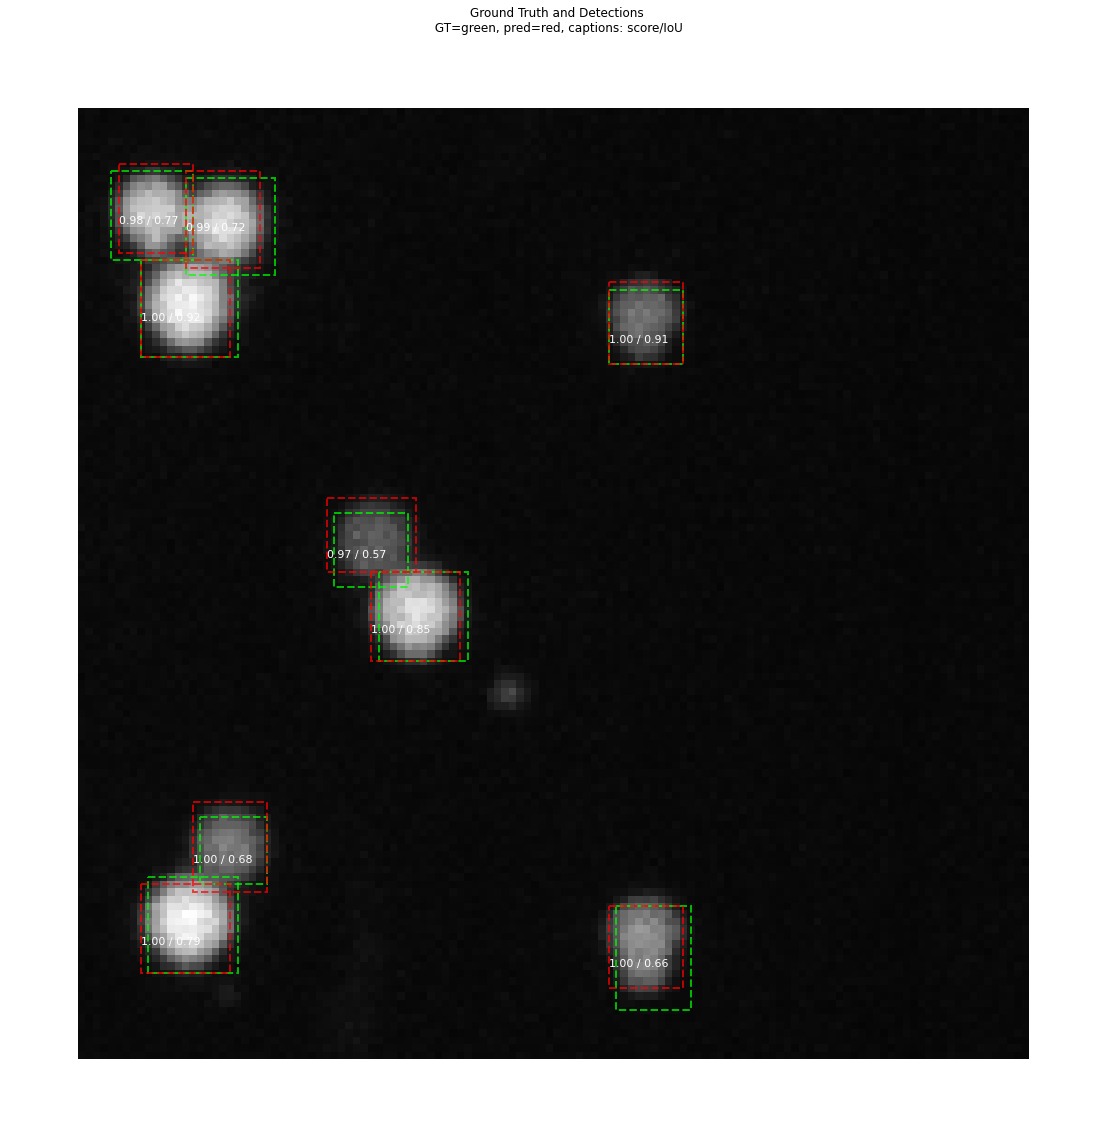

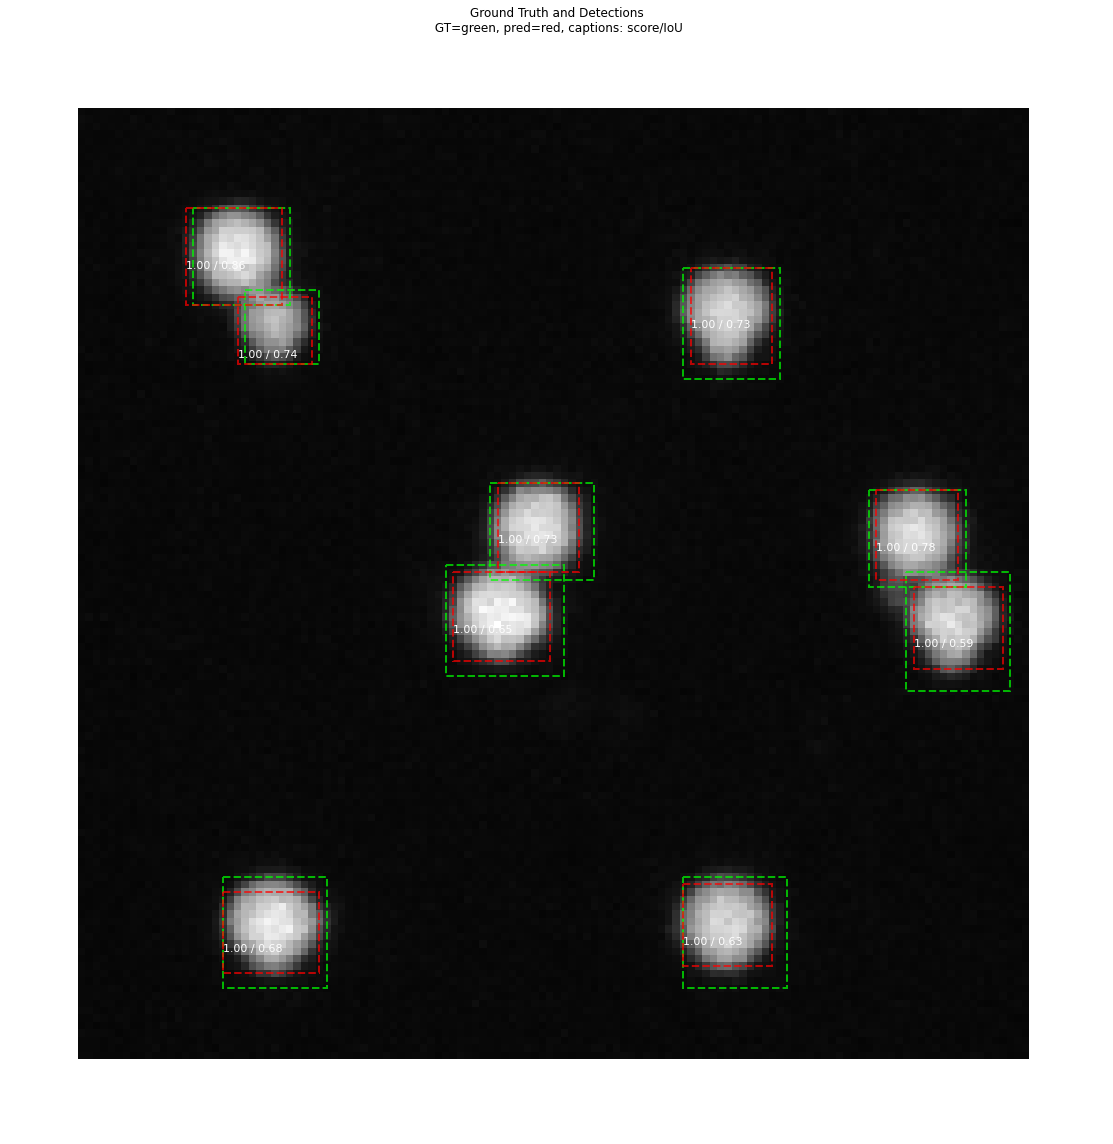

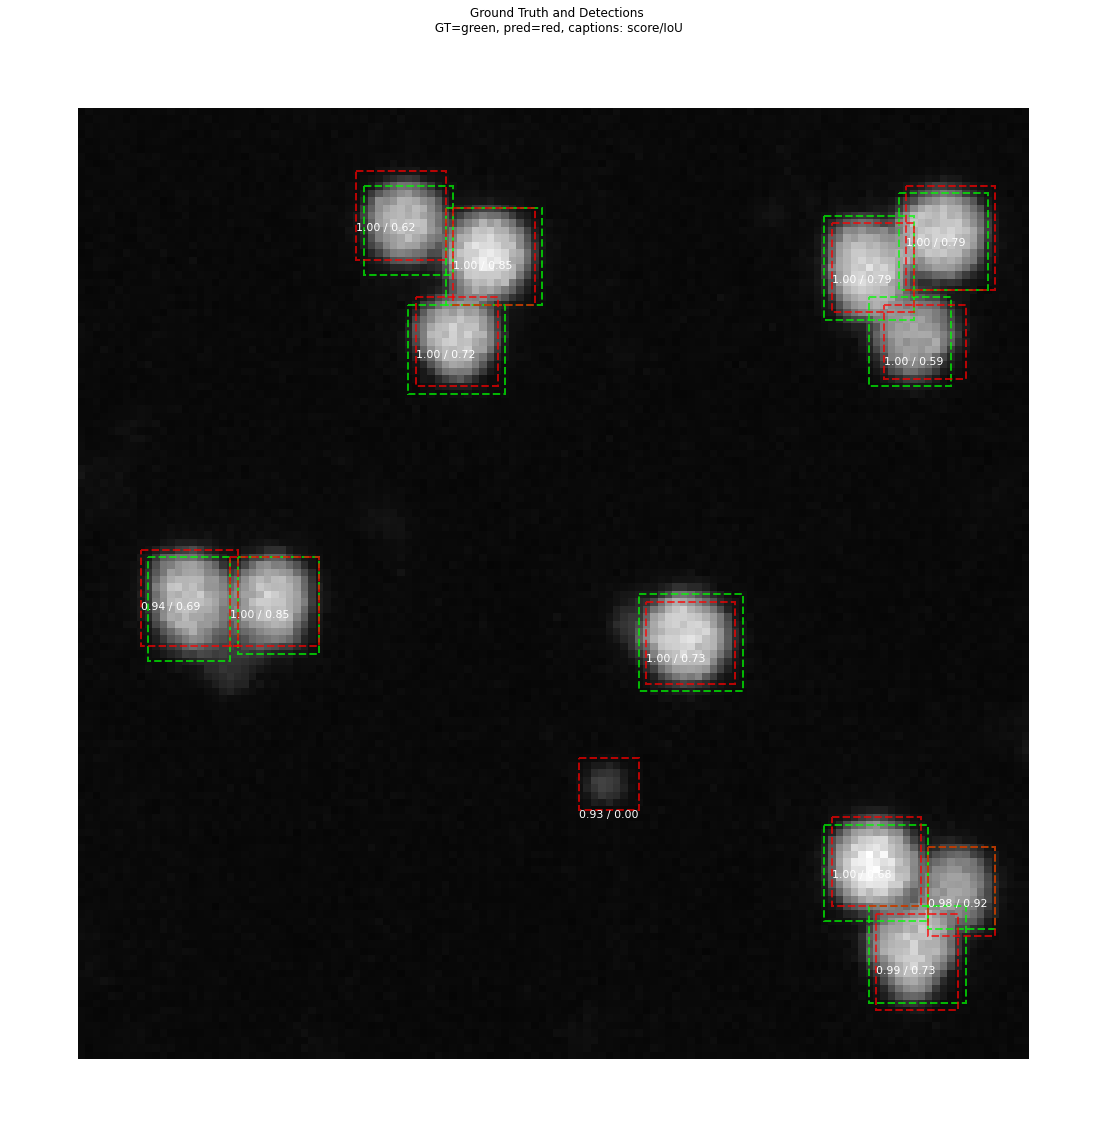

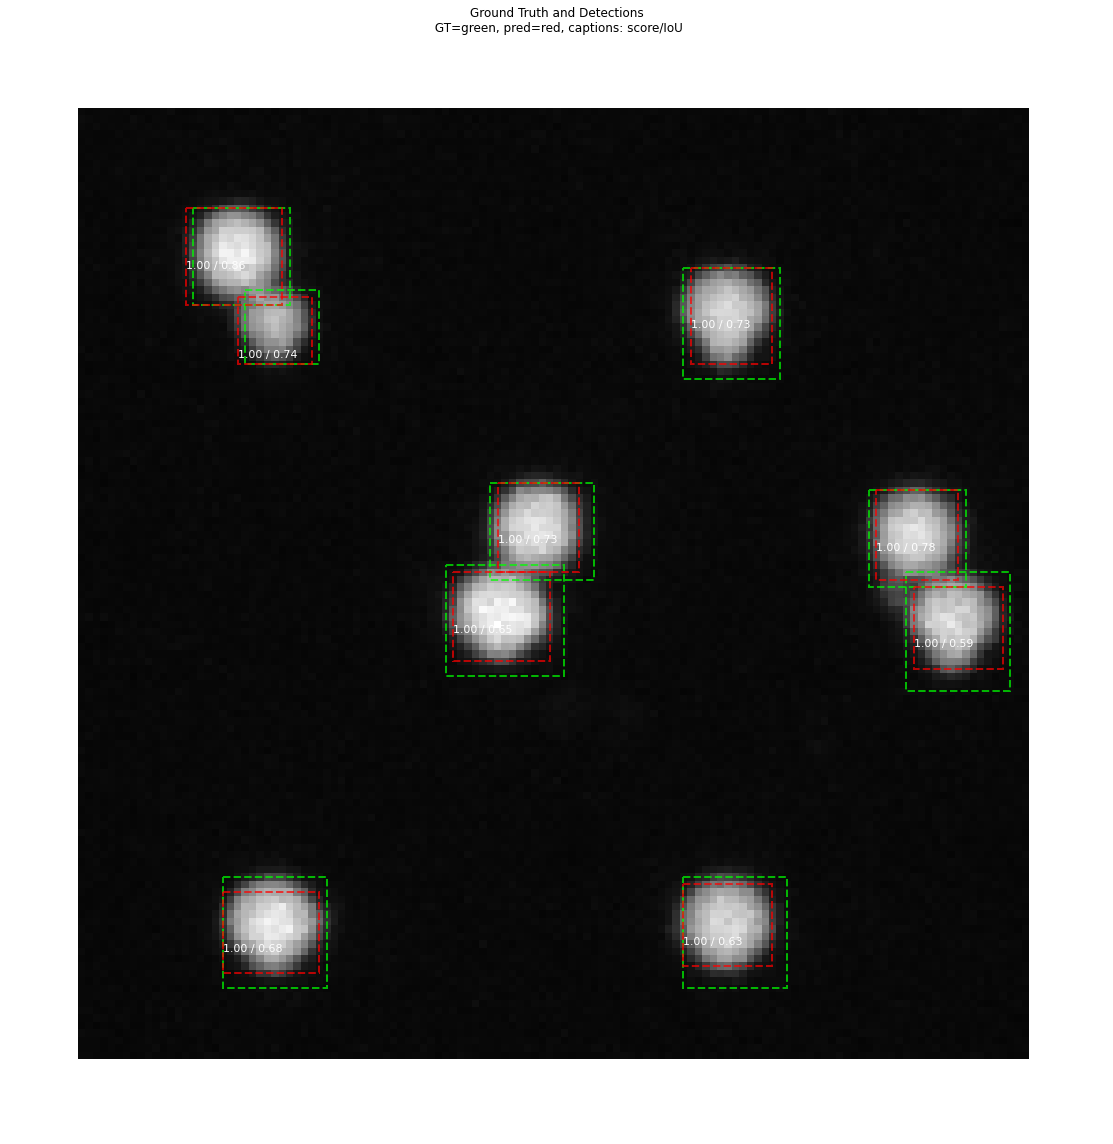

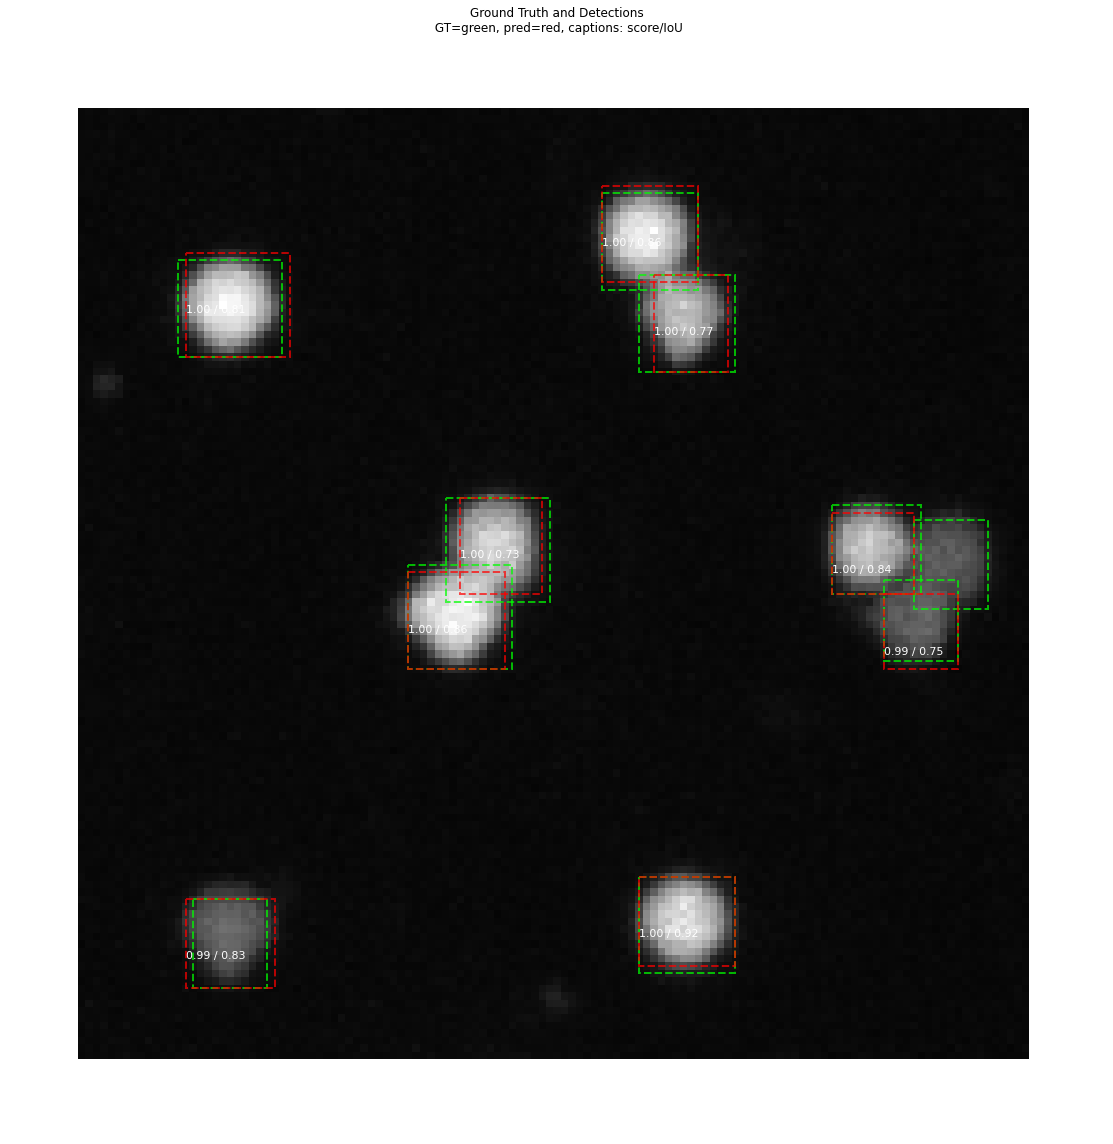

In [13]:

image_ids = np.random.choice(dataset.image_ids,8)

for image_id in image_ids:
    image, image_meta, gt_class_id, gt_bbox =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
    print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                           dataset.image_reference(image_id)))
    print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

    # Run object detection
    results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

    # Display results
    r = results[0]
    print(r)
    print(gt_bbox)
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)

    # Compute AP over range 0.5 to 0.95 and print it
    utils.compute_ap_range(gt_bbox, gt_class_id,
                           r['rois'], r['class_ids'], r['scores'], 
                           verbose=1)

    visualize.display_differences(
        image,
        gt_bbox, gt_class_id, 
        r['rois'], r['class_ids'], r['scores'],
        dataset.class_names, ax=get_ax(),
        show_box=True, show_mask=False,
        iou_threshold=0.5, score_threshold=0.5)


[9 1 4 7]


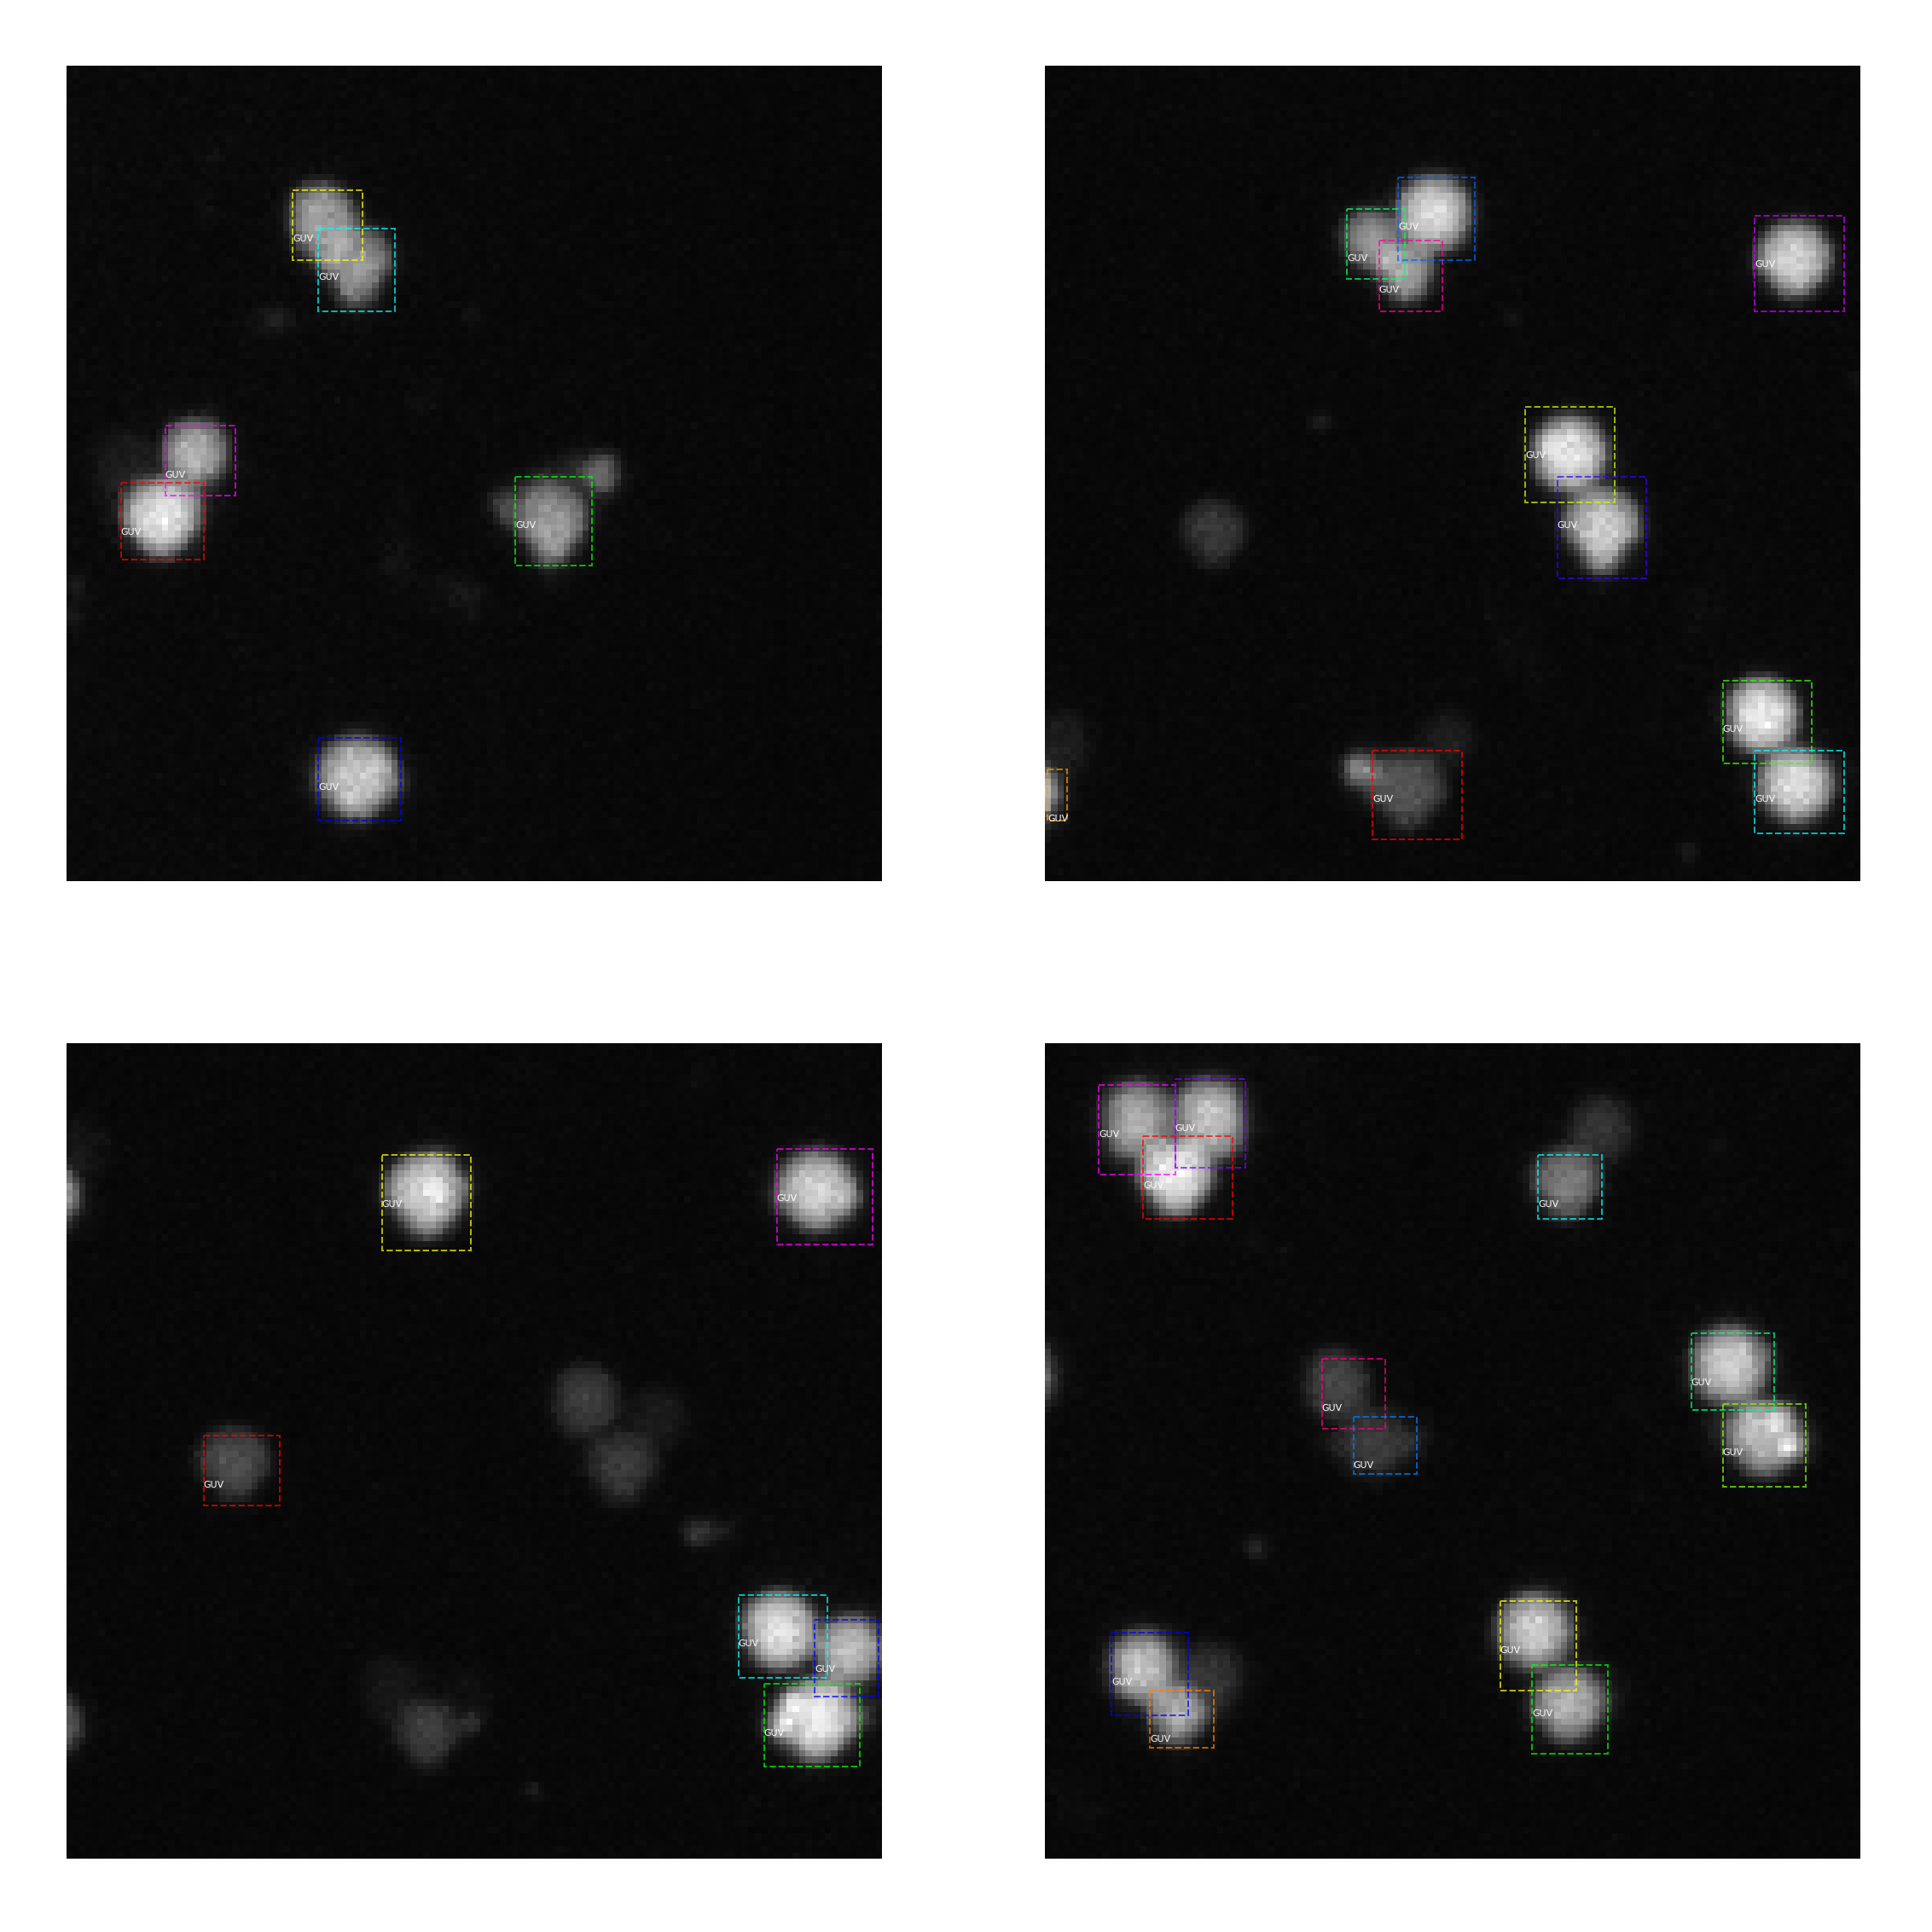

In [21]:
# Load the image 
image_ids = np.random.choice(dataset.image_ids, 4)
print(image_ids)
ax = get_ax(rows=2, cols=limit//2)
for i in range(len(image_ids)):
    image_id = image_ids[i]
    image, image_meta, class_ids, bbox = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)

    visualize.display_instances(image, bbox, class_ids,
                                dataset.class_names, ax=ax[i//2, i % 2],
                                show_mask=False, show_bbox=True)